<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#sandbox" data-toc-modified-id="sandbox-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>sandbox</a></span></li><li><span><a href="#Format" data-toc-modified-id="Format-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#iNEXT:-SpecD" data-toc-modified-id="iNEXT:-SpecD-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>iNEXT: SpecD</a></span><ul class="toc-item"><li><span><a href="#Rarefaction/Extrapolation" data-toc-modified-id="Rarefaction/Extrapolation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Rarefaction/Extrapolation</a></span></li><li><span><a href="#asymptotic-diversity-estimates" data-toc-modified-id="asymptotic-diversity-estimates-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>asymptotic diversity estimates</a></span><ul class="toc-item"><li><span><a href="#iTOL" data-toc-modified-id="iTOL-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>iTOL</a></span></li></ul></li></ul></li><li><span><a href="#iNEXT:-IndD" data-toc-modified-id="iNEXT:-IndD-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>iNEXT: IndD</a></span><ul class="toc-item"><li><span><a href="#Load/format" data-toc-modified-id="Load/format-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Load/format</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Rarefaction/Extrapolation" data-toc-modified-id="Rarefaction/Extrapolation-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Rarefaction/Extrapolation</a></span></li><li><span><a href="#asymptotic-diversity-estimates" data-toc-modified-id="asymptotic-diversity-estimates-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>asymptotic diversity estimates</a></span><ul class="toc-item"><li><span><a href="#iTOL" data-toc-modified-id="iTOL-8.4.1"><span class="toc-item-num">8.4.1&nbsp;&nbsp;</span>iTOL</a></span></li><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-8.4.2"><span class="toc-item-num">8.4.2&nbsp;&nbsp;</span>Saving results</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* estimate sample sizes required to saturate diversity for each sample


# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/'

# microbiome
## 16S-arch phyloseq object (one sample per species)
physeq_arch_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_SpecD.RDS'
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS'

# params
threads = 8



# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(phyloseq)
library(iNEXT)

library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df.dims()
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/ 


# Load

In [4]:
# phyloseq
physeq_arch_SpecD = readRDS(physeq_arch_SpecD_file)
physeq_arch_SpecD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1151 taxa and 110 samples ]
sample_data() Sample Data:       [ 110 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1151 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1151 tips and 1150 internal nodes ]

In [5]:
# metadata
meta = physeq_arch_SpecD %>%
    phyloseq2df(sample_data)
meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F44_Fallow_Deer,F44,Damhirsch,Fallow.Deer,Dama_dama,NA,30532,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F44_Fallow_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X405_Nile_Crocodile,405,Nilkrokodil,Nile.Crocodile,Crocodylus_niloticus,NA,8501,Reptilia,Crocodilia,Crocodylidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X405_Nile_Crocodile
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


# sandbox

In [19]:
# # phyloseq
# physeq_arch = readRDS(physeq_arch_IndD_file)
# physeq_arch

In [20]:
# meta = physeq_arch %>%
#     phyloseq2df(sample_data)
# meta

In [21]:
# otu = physeq_arch %>%
#     phyloseq2df(otu_table, long=TRUE) %>%
#     inner_join(phyloseq2df(physeq_arch, tax_table), 'OTU') %>%
#     inner_join(meta, c('Sample'='SampleID'))
# otu

In [22]:
# # prevalence among samples
# otu_s = otu %>%
#     group_by() %>%
#     mutate(n_samples = Sample %>% unique %>% length) %>%
#     group_by(OTU) %>%
#     summarize(prev = sum(Count > 0) / first(n_samples) * 100)

# otu_s$prev %>% summary_x

In [23]:
# # prevalence among species
# otu_s = otu %>%
#     group_by(OTU, scientific_name) %>%
#     summarize(Count = sum(Count)) %>%
#     group_by() %>%
#     mutate(n_spec = scientific_name %>% unique %>% length) %>%
#     group_by(OTU) %>%
#     summarize(prev = sum(Count > 0) / first(n_spec) * 100)

# otu_s$prev %>% summary_x

# Format

In [12]:
otu = physeq_arch_SpecD %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu

,F14_Common_Bream,F44_Fallow_Deer,F48_Red_Deer,F90_Domestic_Dog,X109_Red_Fox,X111_West_European_Hedgehog,X116_Common_Kestrel,X117_Long_eared_Owl,X119_Ural_Owl,X121_Raccoon_Dog,⋯,X73_One_humped_Camel,X77_Onager,X95_Meadow_Viper,F157a_European_Toad,X133_Domestic_Goat,X281_Tammar_Wallaby,X359_Brown_throated_Sloth,X403_Chacma_Baboon,X405_Nile_Crocodile,X67_European_Roe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0e97060fe4b9be17bddeedcd27826b04,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,5,0,0,0
a86c26bd7f16d93e38b101dbd2614a07,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ef02b880ce3046db6ea55417877cb35b,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
467eeae6997d3667b5d07a76bc1bcdfd,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# iNEXT: SpecD

In [36]:
# WARNING: slow
inext_res = iNEXT(otu, q = 1, datatype = 'abundance', 
                  knots = 50, endpoint = 10000, nboot = 100)
inext_res %>% names

[1] "DataInfo" "iNextEst" "AsyEst"

In [37]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/01_LLA/09_iNEXT.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



## Rarefaction/Extrapolation

In [38]:
inext_res_est = inext_res$iNextEst %>%
    data.table::rbindlist(use.names=TRUE, idcol='SampleID') %>%
    as.data.frame %>%
    inner_join(meta %>% dplyr::select(SampleID, class, diet, habitat), 
               c('SampleID'))
inext_res_est

SampleID,m,method,order,qD,qD.LCL,qD.UCL,SC,SC.LCL,SC.UCL,class,diet,habitat
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
F14_Common_Bream,1,interpolated,1,1.000,1.000,1.000,0.231,0.221,0.240,Actinopterygii,omnivore,aquatic habitat
F14_Common_Bream,151,interpolated,1,7.591,7.207,7.975,0.940,0.938,0.943,Actinopterygii,omnivore,aquatic habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X67_European_Roe,9613,extrapolated,1,3.525,3.345,3.705,1,1,1,Mammalia,herbivore,terrestrial habitat
X67_European_Roe,10000,extrapolated,1,3.525,3.345,3.705,1,1,1,Mammalia,herbivore,terrestrial habitat


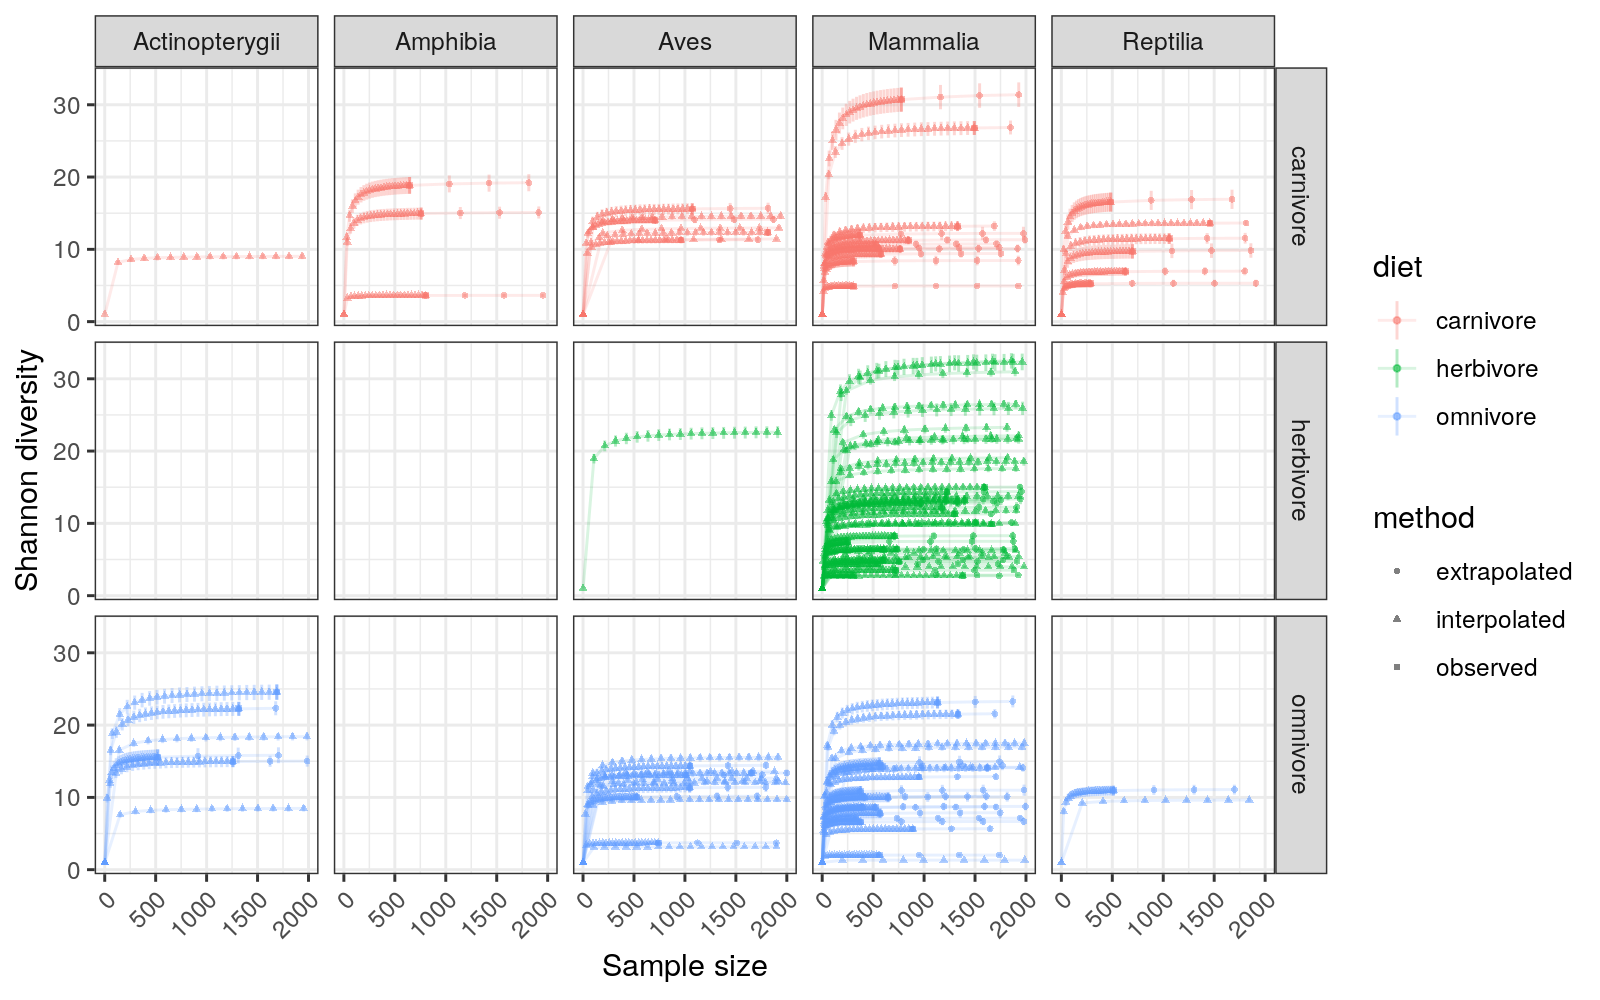

In [59]:
p = inext_res_est %>%
    filter(m <= 2000) %>%
    ggplot(aes(m, qD, ymin=qD.LCL, ymax=qD.UCL, color=diet, group=SampleID)) +
    geom_line(alpha=0.15) +
    geom_linerange(alpha=0.3) +
    geom_point(aes(shape=method), alpha=0.5, size=0.8) +
    labs(x='Sample size', y='Shannon diversity') +
    facet_grid(diet ~ class) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(8,5)
plot(p)

## asymptotic diversity estimates

In [85]:
# asymptotic diversity estimates
inext_res_AsyEst = inext_res$AsyEst %>%
    inner_join(meta %>% dplyr::select(SampleID, class, diet, habitat), 
               c('Site'='SampleID')) %>%
    filter(Diversity == 'Shannon diversity')
inext_res_AsyEst

Warning message:
“Column `Site`/`SampleID` joining factor and character vector, coercing into character vector”


Site,Diversity,Observed,Estimator,s.e.,LCL,UCL,class,diet,habitat
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
F14_Common_Bream,Shannon diversity,8.514,8.558,0.219,8.514,8.987,Actinopterygii,omnivore,aquatic habitat
F44_Fallow_Deer,Shannon diversity,22.293,22.368,0.289,22.293,22.935,Mammalia,herbivore,terrestrial habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X405_Nile_Crocodile,Shannon diversity,16.536,16.959,0.641,16.536,18.215,Reptilia,carnivore,terrestrial habitat
X67_European_Roe,Shannon diversity,3.510,3.525,0.092,3.510,3.705,Mammalia,herbivore,terrestrial habitat


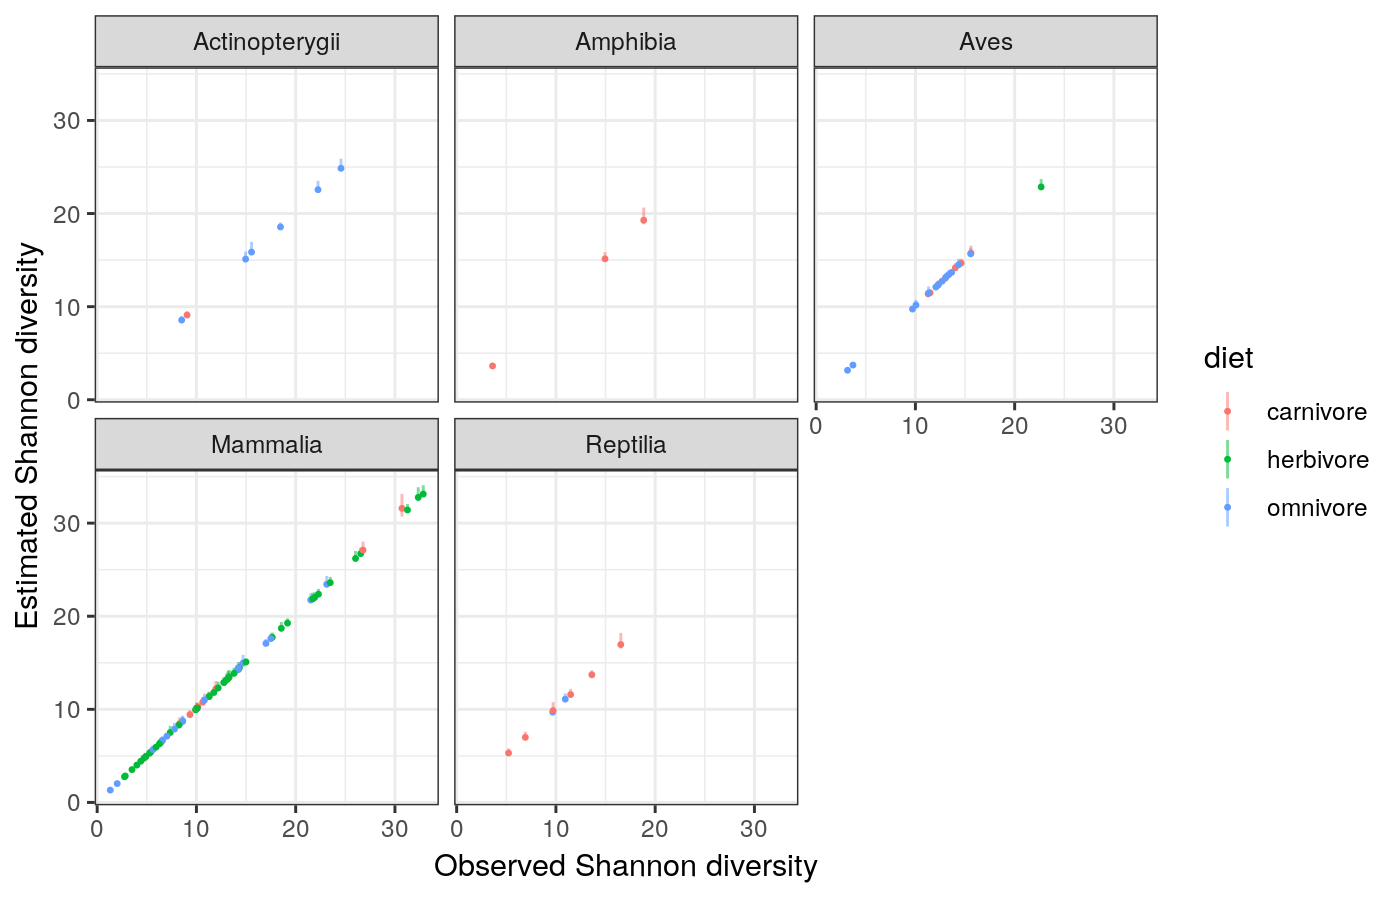

In [86]:
# plotting
p = inext_res_AsyEst %>%
    ggplot(aes(Observed, Estimator, color=diet)) +
    geom_linerange(aes(ymin=LCL, ymax=UCL), alpha=0.5) +
    geom_point(size=0.5) +
    labs(x='Observed Shannon diversity',
         y='Estimated Shannon diversity') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(7,4.5)
plot(p)

### iTOL 

* creating data file for mapping onto host tree

In [87]:
# adding more metadata
inext_res_AsyEst_j = inext_res_AsyEst %>%
    filter(Diversity == 'Shannon diversity') %>%
    inner_join(meta, c('Site'='SampleID', 'class'='class', 
                       'diet'='diet', 'habitat'='habitat'))

inext_res_AsyEst_j

Site,Diversity,Observed,Estimator,s.e.,LCL,UCL,class,diet,habitat,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,Shannon diversity,8.514,8.558,0.219,8.514,8.987,Actinopterygii,omnivore,aquatic habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F44_Fallow_Deer,Shannon diversity,22.293,22.368,0.289,22.293,22.935,Mammalia,herbivore,terrestrial habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F44_Fallow_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X405_Nile_Crocodile,Shannon diversity,16.536,16.959,0.641,16.536,18.215,Reptilia,carnivore,terrestrial habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X405_Nile_Crocodile
X67_European_Roe,Shannon diversity,3.510,3.525,0.092,3.510,3.705,Mammalia,herbivore,terrestrial habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


In [90]:
# summarizing 
x = inext_res_AsyEst_j %>%
    group_by(scientific_name) %>%
    summarize(minimum = LCL,
              q1 = Estimator,
              median = Estimator,
              q3 = Estimator,
              maximum = UCL) %>%
    ungroup() %>%
    as.data.frame

rownames(x) = x$scientific_name
x$scientific_name = NULL
x

,minimum,q1,median,q3,maximum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abramis_brama,8.514,8.558,8.558,8.558,8.987
Aepyceros_melampus,19.178,19.261,19.261,19.261,19.768
⋮,⋮,⋮,⋮,⋮,⋮
Vulpes_vulpes,8.626,8.750,8.750,8.750,9.313
Zamenis_longissimus,6.918,6.991,6.991,6.991,7.599


In [91]:
# writing itol input file
D = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/dataset_explore/'
F = file.path(D, 'SpecD_shannon-hill_boxplot.txt')
itol_boxplot(x, 'shannon_hill_index', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/dataset_explore//SpecD_shannon-hill_boxplot.txt 


# iNEXT: IndD

## Load/format

In [94]:
# phyloseq
physeq_arch_IndD = readRDS(physeq_arch_IndD_file)
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [95]:
# metadata
meta = physeq_arch_IndD %>%
    phyloseq2df(sample_data)
meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


In [96]:
# format
otu = physeq_arch_IndD %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu

,F14_Common_Bream,F35_Red_Deer,F36_Red_Deer,F44_Fallow_Deer,F45_Red_Deer,F46_Red_Deer,F47_Red_Deer,F48_Red_Deer,F53_Mouflon,F66_Wild_Boar,⋯,X133_Domestic_Goat,X134_Domestic_Goat,X281_Tammar_Wallaby,X3_Alpine_Chamois,X357_Northern_Tamandua,X359_Brown_throated_Sloth,X403_Chacma_Baboon,X405_Nile_Crocodile,X431_Quagga,X67_European_Roe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0e97060fe4b9be17bddeedcd27826b04,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,5,0,0,0,0
a86c26bd7f16d93e38b101dbd2614a07,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9449f372c36cd2d8994d79b091425d42,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
467eeae6997d3667b5d07a76bc1bcdfd,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Run

In [97]:
# WARNING: slow
inext_res = iNEXT(otu, q = 1, datatype = 'abundance', 
                  knots = 50, endpoint = 10000, nboot = 100)
inext_res %>% names

[1] "DataInfo" "iNextEst" "AsyEst"

In [98]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/01_LLA/09_iNEXT.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



## Rarefaction/Extrapolation

In [99]:
inext_res_est = inext_res$iNextEst %>%
    data.table::rbindlist(use.names=TRUE, idcol='SampleID') %>%
    as.data.frame %>%
    inner_join(meta %>% dplyr::select(SampleID, class, diet, habitat), 
               c('SampleID'))
inext_res_est

SampleID,m,method,order,qD,qD.LCL,qD.UCL,SC,SC.LCL,SC.UCL,class,diet,habitat
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
F14_Common_Bream,1,interpolated,1,1.000,1.000,1.000,0.231,0.221,0.240,Actinopterygii,omnivore,aquatic habitat
F14_Common_Bream,151,interpolated,1,7.591,7.211,7.972,0.940,0.937,0.943,Actinopterygii,omnivore,aquatic habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X67_European_Roe,9613,extrapolated,1,3.525,3.346,3.704,1,1,1,Mammalia,herbivore,terrestrial habitat
X67_European_Roe,10000,extrapolated,1,3.525,3.346,3.704,1,1,1,Mammalia,herbivore,terrestrial habitat


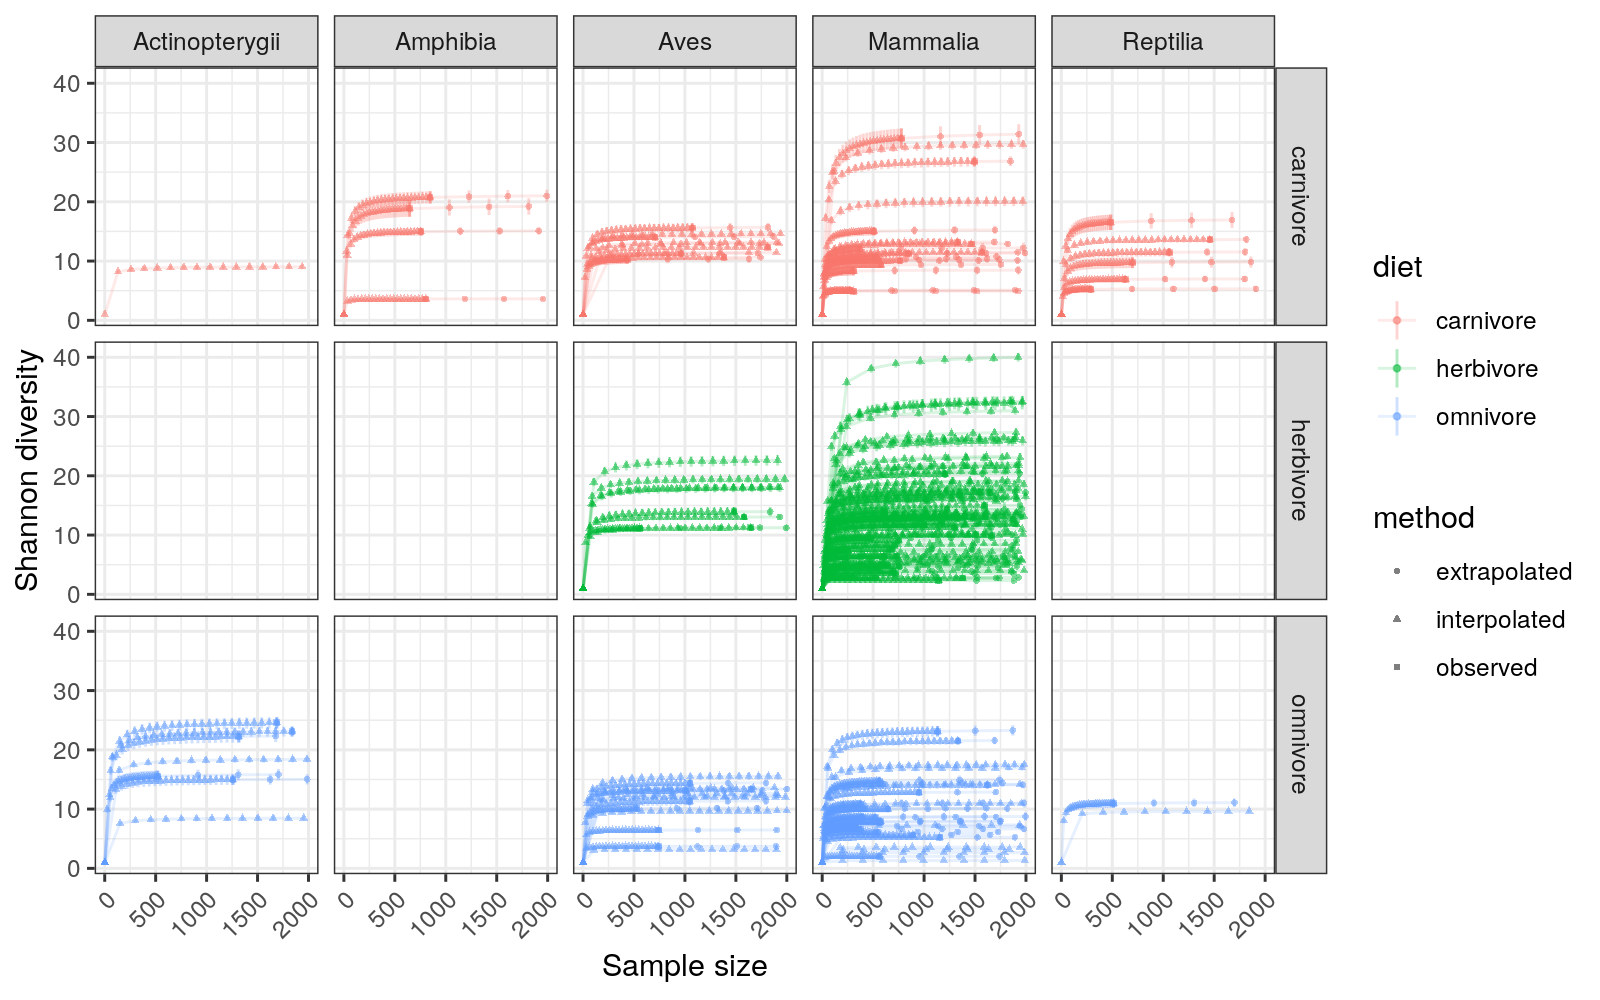

In [100]:
p = inext_res_est %>%
    filter(m <= 2000) %>%
    ggplot(aes(m, qD, ymin=qD.LCL, ymax=qD.UCL, color=diet, group=SampleID)) +
    geom_line(alpha=0.15) +
    geom_linerange(alpha=0.3) +
    geom_point(aes(shape=method), alpha=0.5, size=0.8) +
    labs(x='Sample size', y='Shannon diversity') +
    facet_grid(diet ~ class) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(8,5)
plot(p)

## asymptotic diversity estimates

In [101]:
# asymptotic diversity estimates
inext_res_AsyEst = inext_res$AsyEst %>%
    inner_join(meta %>% dplyr::select(SampleID, class, diet, habitat), 
               c('Site'='SampleID')) %>%
    filter(Diversity == 'Shannon diversity')
inext_res_AsyEst

Warning message:
“Column `Site`/`SampleID` joining factor and character vector, coercing into character vector”


Site,Diversity,Observed,Estimator,s.e.,LCL,UCL,class,diet,habitat
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
F14_Common_Bream,Shannon diversity,8.514,8.558,0.232,8.514,9.012,Actinopterygii,omnivore,aquatic habitat
F35_Red_Deer,Shannon diversity,12.673,12.742,0.239,12.673,13.209,Mammalia,herbivore,terrestrial habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Shannon diversity,8.545,8.585,0.196,8.545,8.97,Mammalia,herbivore,terrestrial habitat
X67_European_Roe,Shannon diversity,3.510,3.525,0.084,3.510,3.69,Mammalia,herbivore,terrestrial habitat


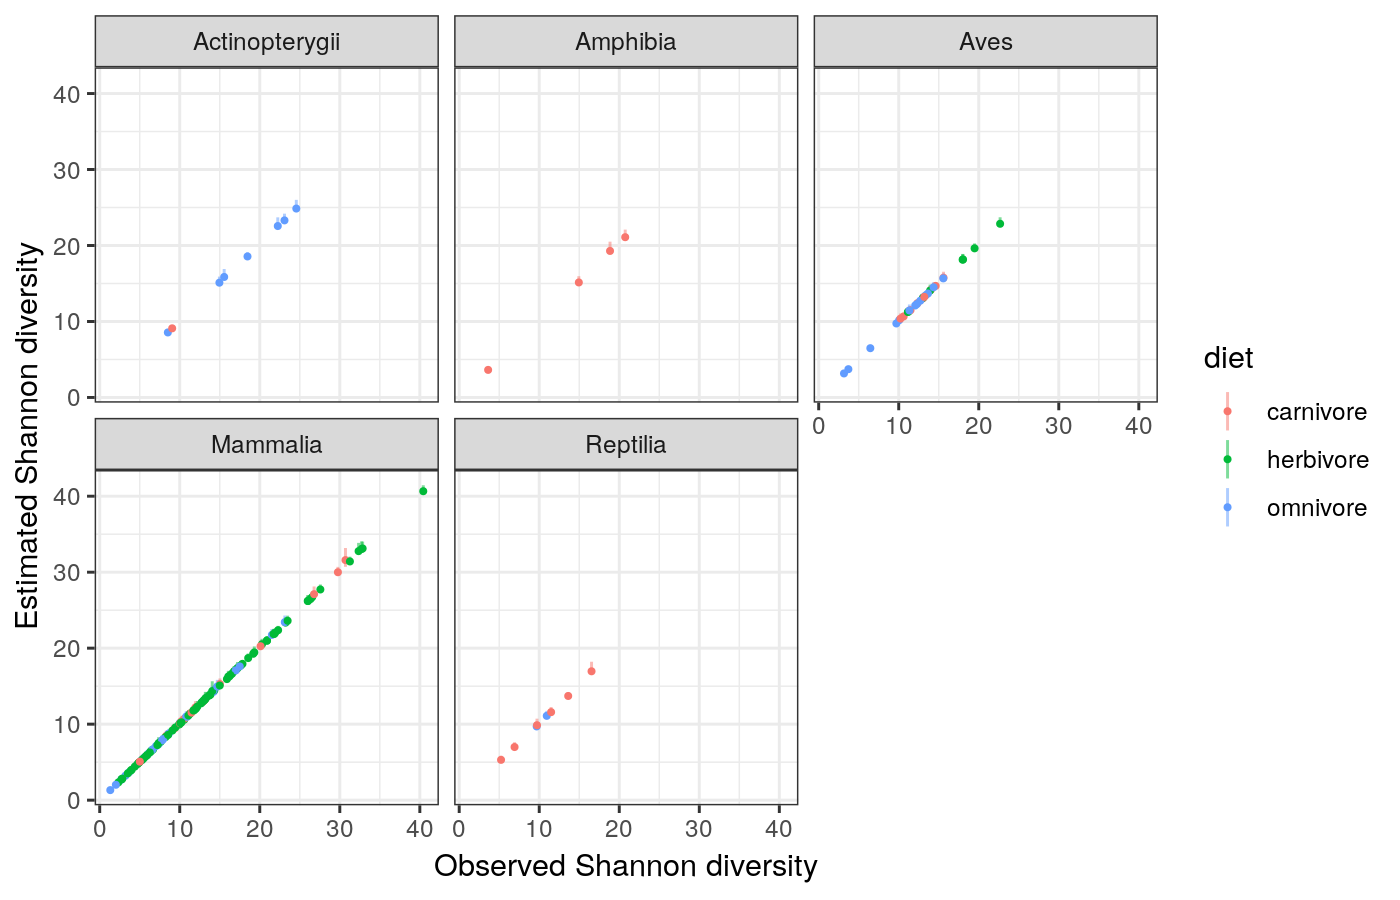

In [103]:
# plotting
p = inext_res_AsyEst %>%
    ggplot(aes(Observed, Estimator, color=diet)) +
    geom_linerange(aes(ymin=LCL, ymax=UCL), alpha=0.5) +
    geom_point(size=0.7) +
    labs(x='Observed Shannon diversity',
         y='Estimated Shannon diversity') +
    facet_wrap(~ class) +
    theme_bw() 

p.dims(7,4.5)
plot(p)

### iTOL

In [104]:
# adding more metadata
inext_res_AsyEst_j = inext_res_AsyEst %>%
    filter(Diversity == 'Shannon diversity') %>%
    inner_join(meta, c('Site'='SampleID', 'class'='class', 
                       'diet'='diet', 'habitat'='habitat'))
inext_res_AsyEst_j

Site,Diversity,Observed,Estimator,s.e.,LCL,UCL,class,diet,habitat,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,Shannon diversity,8.514,8.558,0.232,8.514,9.012,Actinopterygii,omnivore,aquatic habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F35_Red_Deer,Shannon diversity,12.673,12.742,0.239,12.673,13.209,Mammalia,herbivore,terrestrial habitat,⋯,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Shannon diversity,8.545,8.585,0.196,8.545,8.97,Mammalia,herbivore,terrestrial habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga
X67_European_Roe,Shannon diversity,3.510,3.525,0.084,3.510,3.69,Mammalia,herbivore,terrestrial habitat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


In [106]:
# summarizing 
x = inext_res_AsyEst_j %>%
    group_by(scientific_name) %>%
    summarize(minimum = min(Estimator),
              q1 = quantile(Estimator, 0.25),
              median = median(Estimator),
              q3 = quantile(Estimator, 0.75),
              maximum = max(Estimator)) %>%
    ungroup() %>%
    as.data.frame

rownames(x) = x$scientific_name
x$scientific_name = NULL
x

,minimum,q1,median,q3,maximum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abramis_brama,8.558,8.55800,8.5580,8.55800,8.558
Aepyceros_melampus,19.261,19.91475,20.5685,21.22225,21.876
⋮,⋮,⋮,⋮,⋮,⋮
Vulpes_vulpes,8.750,8.750,8.750,8.750,8.750
Zamenis_longissimus,6.991,6.991,6.991,6.991,6.991


In [107]:
# writing itol input file
D = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/dataset_explore/'
F = file.path(D, 'IndD_shannon-hill_boxplot.txt')
itol_boxplot(x, 'shannon_hill_index', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/dataset_explore//IndD_shannon-hill_boxplot.txt 


### Saving results

In [109]:
D = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity/'
P = file.path(D, 'alpha_div_iNEXT.RDS')
saveRDS(inext_res, P)
cat('File written:', P, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//alpha_div_iNEXT.RDS 


# sessionInfo

In [60]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.5 iNEXT_2.0.20      phyloseq_1.30.0   ggplot2_3.2.1    
[5] tidyr_1.0.0       dplyr_0.8.5      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3          ape_5.3             lattice_0.20-38    
 [4] Biostrings_2.54.0   assertthat_0.2.1    digest_0.